In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array  
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer    
from sklearn.model_selection import train_test_split
from imutils import paths
import numpy as np
import os
import cv2
import random
from sklearn.utils import shuffle
from imutils import paths
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import SGD, Adam

In [62]:
import keras
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
from keras.layers import BatchNormalization    
from keras.layers.convolutional import Conv2D, MaxPooling2D    
from keras.layers.core import Activation, Flatten,Dense , Dropout     
from keras.models import Sequential


In [20]:
#Loading the data...
dataset='C:/Users/Pingo9o1/Downloads/DATA_Maguire_20180517_ALL/DATA_Maguire_20180517_ALL/SDNET2018/P'


In [21]:
#list of image paths
imagepaths=sorted(list(paths.list_images(dataset)))

In [23]:
imagepaths

['C:/Users/Pingo9o1/Downloads/DATA_Maguire_20180517_ALL/DATA_Maguire_20180517_ALL/SDNET2018/P\\CP\\001-100.jpg',
 'C:/Users/Pingo9o1/Downloads/DATA_Maguire_20180517_ALL/DATA_Maguire_20180517_ALL/SDNET2018/P\\CP\\001-101.jpg',
 'C:/Users/Pingo9o1/Downloads/DATA_Maguire_20180517_ALL/DATA_Maguire_20180517_ALL/SDNET2018/P\\CP\\001-102.jpg',
 'C:/Users/Pingo9o1/Downloads/DATA_Maguire_20180517_ALL/DATA_Maguire_20180517_ALL/SDNET2018/P\\CP\\001-103.jpg',
 'C:/Users/Pingo9o1/Downloads/DATA_Maguire_20180517_ALL/DATA_Maguire_20180517_ALL/SDNET2018/P\\CP\\001-104.jpg',
 'C:/Users/Pingo9o1/Downloads/DATA_Maguire_20180517_ALL/DATA_Maguire_20180517_ALL/SDNET2018/P\\CP\\001-105.jpg',
 'C:/Users/Pingo9o1/Downloads/DATA_Maguire_20180517_ALL/DATA_Maguire_20180517_ALL/SDNET2018/P\\CP\\001-106.jpg',
 'C:/Users/Pingo9o1/Downloads/DATA_Maguire_20180517_ALL/DATA_Maguire_20180517_ALL/SDNET2018/P\\CP\\001-107.jpg',
 'C:/Users/Pingo9o1/Downloads/DATA_Maguire_20180517_ALL/DATA_Maguire_20180517_ALL/SDNET2018/P\\C

In [36]:
#Function to put the data in a list and make a separate list for labels...

def splitting_data(imagepaths):
    
        data   = []                       #data list
        labels = []                       # Labels list (binary class)
        
        random.shuffle(imagepaths)          #for shuffling
        
        for imagepath in imagepaths:
            try:                                              #Exceptions Handling
                img=cv2.imread(imagepath)
                img = cv2.resize(img, (64, 64))         
                img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
                label = imagepath.split(os.path.sep)[-2]      #to extract label from folder name 
                data.append(img)
                labels.append(label)
                
            except Exception as e:                             
                print(e)

    
        data=np.array(data)
        labels=np.array(labels)             #changed to numpy arrays
    
        return (data, labels)                #returning list of data and labels
    


In [37]:
#calling the split function...

data, labels= splitting_data(imagepaths)

In [26]:
data

array([[[[166, 177, 185],
         [149, 160, 168],
         [152, 163, 171],
         ...,
         [154, 163, 172],
         [155, 164, 173],
         [147, 156, 165]],

        [[156, 167, 175],
         [162, 173, 181],
         [154, 165, 173],
         ...,
         [164, 173, 182],
         [160, 169, 178],
         [142, 151, 160]],

        [[153, 164, 172],
         [160, 171, 179],
         [160, 171, 179],
         ...,
         [144, 153, 162],
         [127, 136, 145],
         [116, 125, 134]],

        ...,

        [[182, 201, 208],
         [166, 184, 191],
         [170, 185, 192],
         ...,
         [183, 195, 203],
         [158, 170, 178],
         [153, 171, 178]],

        [[144, 163, 170],
         [153, 171, 178],
         [174, 188, 196],
         ...,
         [167, 177, 186],
         [116, 126, 134],
         [121, 137, 144]],

        [[139, 151, 159],
         [161, 172, 180],
         [158, 167, 176],
         ...,
         [145, 146, 156],
        

In [27]:
labels

array(['CP', 'UP', 'UP', ..., 'UP', 'UP', 'UP'], dtype='<U2')

In [28]:
#Checking the number of labels for each type...
print(Counter(labels))

#there is a huge data mismatch, therefore, augmentation will be used below for oversampling the data

Counter({'UP': 20669, 'CP': 2573})


In [29]:
#list of target labels...

target_name=['Cracked', 'Uncracked']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.20, random_state=4)

In [44]:
#ENcoding the labels, before feature extraction

def target_onehotencoding(y_train, y_test):
    
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    y_trainenc = to_categorical(y_train_enc)
    y_testenc=  to_categorical(y_test_enc)
    return y_trainenc, y_testenc


#Calling the one_hot_encoder function...

y_train, y_test= target_onehotencoding(y_train, y_test)
      

In [45]:
#sanity check:1

print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (18593, 64, 64, 3)
y_train shape: (18593, 2)
x_test shape: (4649, 64, 64, 3)
y_test shape: (4649, 2)


In [48]:
#sanity check 2: For Data splitting (training) 
x_train

array([[[[154, 165, 173],
         [158, 169, 177],
         [178, 189, 197],
         ...,
         [132, 149, 165],
         [ 91, 104, 116],
         [ 44,  46,  56]],

        [[165, 176, 184],
         [152, 163, 171],
         [146, 157, 165],
         ...,
         [ 81,  94, 112],
         [ 23,  32,  50],
         [ 30,  33,  51]],

        [[154, 165, 173],
         [121, 132, 140],
         [168, 179, 187],
         ...,
         [146, 155, 171],
         [195, 202, 220],
         [177, 188, 205]],

        ...,

        [[ 47,  57,  85],
         [ 28,  30,  55],
         [ 53,  46,  59],
         ...,
         [154, 170, 183],
         [156, 172, 185],
         [151, 167, 180]],

        [[168, 189, 215],
         [127, 138, 165],
         [140, 140, 162],
         ...,
         [152, 168, 181],
         [145, 161, 174],
         [142, 158, 171]],

        [[154, 186, 189],
         [181, 205, 221],
         [118, 132, 158],
         ...,
         [144, 160, 173],
        

In [49]:
#sanity check 3: For one hot encoding
y_train

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

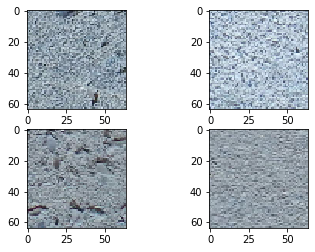

In [115]:
#plotting few samples from the dataset

plt.subplot(221)
plt.imshow(x_train[22], cmap=plt.get_cmap('gray'))

plt.subplot(222)
plt.imshow(x_train[55], cmap=plt.get_cmap('gray'))

plt.subplot(223)
plt.imshow(x_train[88], cmap=plt.get_cmap('gray'))

plt.subplot(224)
plt.imshow(x_train[99], cmap=plt.get_cmap('gray'))

plt.show()

In [50]:
#Data augmentation objects with geometrical manipulations...

validationdatagenerator = ImageDataGenerator()
traindatagenerator = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,rotation_range=10,
                                        zoom_range=0.15, horizontal_flip=False, fill_mode='nearest',
                                        vertical_flip=False,shear_range=0.15)


#Hyperprameters...

batch_size = 16

# number of epochs to train
num_epochs = 20

#custom optimiser initliazed 
opt= Adam(lr=0.0001)


Now the model is being compiled


C:\Users\Pingo9o1\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [63]:
#Function for developing Deep-CNN model for SDNET dataset...


def build_emo(numchannels, imgrows , imgcolumns, numclasses):
        
        model=Sequential()
        
        inputShape=(imgrows, imgcolumns, numchannels)      #for the CNN network
        
        if K.image_data_format()=="channel_first":
            
            inputShape=(imgrows, imgcolumns, numchannels)         
                
        model.add(Conv2D(32, (3,3), kernel_regularizer=keras.regularizers.l1(0.001), padding="same", input_shape=inputShape))      #input shape is specified (rows,colums, channels)
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=-1))
        model.add(MaxPooling2D(pool_size=(2,2)))  
            
        model.add(Conv2D(64, (3,3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=-1))
   
        model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=keras.regularizers.l1(0.001), activation='relu'))    
        model.add(BatchNormalization(axis=-1))             
        model.add(MaxPooling2D())
        
        model.add(Conv2D(128, (3, 3),kernel_regularizer=keras.regularizers.l1(0.001), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=-1))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.10))

        model.add(Flatten())
        model.add(Dense(128))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=-1))
        model.add(Dropout(0.2))
               
        model.add(Dense(activation='softmax', units=2))    
        return model


In [64]:
#calling the model function...

model=build_emo(numchannels=3, imgrows=64 , imgcolumns=64, numclasses=target_name)

In [65]:
#Compiling the CNN model...

model.compile(loss="binary_crossentropy", optimizer = opt, metrics=["accuracy"])
Print("Model succesfully compiled")

#printing model summary...

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        2

In [66]:
#calling the Data augmentation Object...

train_generator=traindatagenerator.flow(x_train, y_train, batch_size=batch_size) 
validation_generator=validationdatagenerator.flow(x_test, y_test, batch_size=batch_size)



In [67]:
#fitting the CNN model to start the training...

history1=model.fit_generator(train_generator, steps_per_epoch=int(len(x_train)/batch_size), epochs=num_epochs, 
                    validation_data=validation_generator, validation_steps=int(len(x_test)/batch_size))




C:\Users\Pingo9o1\AppData\Roaming\Python\Python37\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
1162/1162 [==============================] - 284s 241ms/step - loss: 5.4900 - accuracy: 0.7715 - val_loss: 4.1730 - val_accuracy: 0.8543
Epoch 2/20
1162/1162 [==============================] - 246s 211ms/step - loss: 2.6464 - accuracy: 0.8889 - val_loss: 1.7252 - val_accuracy: 0.8737
Epoch 3/20
1162/1162 [==============================] - 148s 127ms/step - loss: 1.0366 - accuracy: 0.8957 - val_loss: 0.7319 - val_accuracy: 0.8894
Epoch 4/20
1162/1162 [==============================] - 148s 128ms/step - loss: 0.5935 - accuracy: 0.8970 - val_loss: 0.6040 - val_accuracy: 0.8940
Epoch 5/20
1162/1162 [==============================] - 138s 118ms/step - loss: 0.5015 - accuracy: 0.8978 - val_loss: 0.5951 - val_accuracy: 0.8664
Epoch 6/20
1162/1162 [==============================] - 132s 114ms/step - loss: 0.4730 - accuracy: 0.9002 - val_loss: 0.6187 - val_accuracy: 0.8539
Epoch 7/20
1162/1162 [==============================] - 140s 121ms/step - loss: 0.4531 - accuracy: 0.9040 - val_

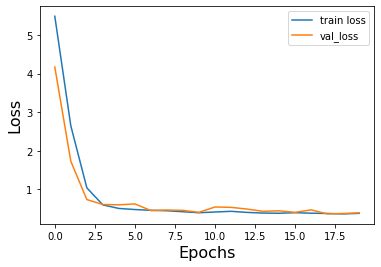

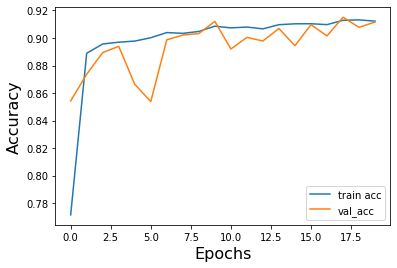

In [72]:
#Plots of accuracy and Loss curves...


import matplotlib.pyplot as plt

plt.plot(history1.history['loss'], label = 'train loss')
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=16)
plt.plot(history1.history['val_loss'], label='val_loss')
plt.legend()
plt.show()



plt.plot(history1.history['accuracy'], label = 'train acc')
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=16)
plt.plot(history1.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()


In [99]:
#Evaluating train and test accuracy...

scoreTrain=model.evaluate(x_train,y_train,verbose=0)
print("training Loss: " ,scoreTrain[0])
print("training accuracy :", scoreTrain[1])

scores = model.evaluate(x_test, y_test , verbose=0)
print('test Loss :'  ,scores[0])   
print('test accuracy : ' , scores[1])
                 


training Loss:  0.3921999931335449
training accuracy : 0.9121712446212769
test Loss : 0.387251079082489
test accuracy :  0.911378800868988


In [76]:
#Confusion Matrix analysis...


from sklearn.metrics import confusion_matrix 
import sklearn.metrics as metrics
import seaborn as sns

y_pred=model.predict(x_test)

ypred_class = np.argmax(y_pred, axis=1)
matrix = confusion_matrix(y_test.argmax(axis=1), ypred_class)
#print(matrix)


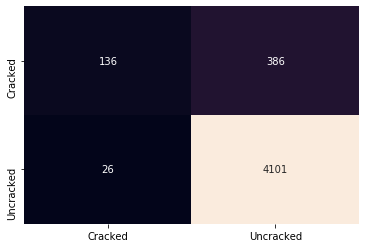

In [102]:
#Plot of confusion matrix in the form of a Heatmap...

sns.heatmap(matrix, annot=True, fmt='d', 
            cbar=False, xticklabels=target_name, yticklabels=target_name)

#analysis

"""
From the above confusion matrix, it can be observed that the number of False negatives are few as compared to true positives, which is a 
good preliminary sign
"""

In [100]:
#printing the detailed classification report...

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test.argmax(axis=1), ypred_class, target_names=target_name))


#analysis:

"""
The model is highly precise for cracked and uncracked images, however, the sensitivity (recall) suffered in case of cracked images
which can be due to the fact that the images for cracked label (even after augmentation) were not sufficient for deep learning model
therefore the true positive rate is less
"""



Classification Report

              precision    recall  f1-score   support

     Cracked       0.84      0.26      0.40       522
   Uncracked       0.91      0.99      0.95      4127

    accuracy                           0.91      4649
   macro avg       0.88      0.63      0.67      4649
weighted avg       0.91      0.91      0.89      4649



In [81]:
#saving the final classification model weigths...

model.save('crack_detection.h5') 